# Regression Exercises

## Linear

In [2]:
# Loading data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read data from Github
data_url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/ex1data2.txt"
data_array = np.genfromtxt(data_url, delimiter=',')

# The columns in this data set are define as folows:
"""
    0 = floor area
    1 = number of bedrooms
    2 = sale price
"""
    
# store the relevant columns in more descriptive variables
x_sqft = data_array[:,0]
y_value = data_array[:,2]

[2104. 1600. 2400. 1416. 3000. 1985. 1534. 1427. 1380. 1494. 1940. 2000.
 1890. 4478. 1268. 2300. 1320. 1236. 2609. 3031. 1767. 1888. 1604. 1962.
 3890. 1100. 1458. 2526. 2200. 2637. 1839. 1000. 2040. 3137. 1811. 1437.
 1239. 2132. 4215. 2162. 1664. 2238. 2567. 1200.  852. 1852. 1203.]


Here we'll build off of the tutorial exercise, first finding the best linear fit for floor area (sqft) vs valued price (USD). Recall that setting the derivative = 0 and solving for 𝑏 & 𝑚 produces formula for the best fit trend:
$$ m = \frac{\sum^n_{i=1} (x_i-x_{mean})(y_i-y_{mean})}{\sum^n_{i=1} (x_i-x_{mean})^2} $$
$$ b = y_{mean}-m*x_{mean} $$

In [30]:
def find_best_fit(xx,yy):
    '''
      This function finds the best linear fit for yy vs xx
    '''
  
    ## YOUR CODE HERE
    x_residuals = xx - xx.mean()
    y_residuals = yy - yy.mean()
    residuals_multiplied = np.multiply(x_residuals, y_residuals)
    x_residuals_squared = np.multiply(x_residuals, x_residuals) 

    m = residuals_multiplied.sum() / (x_residuals_squared.sum())
    b = y_value.mean() - m * xx.mean()
    return (m, b)

In [31]:
# Use your function to show the best fit values for our data
(mm,bb) = find_best_fit(x_sqft, y_value)
fit_str = 'y = {aa:.1f}x + {bb:.1f}'
print(fit_str.format(aa=mm,bb=bb))

y = 134.5x + 71270.5


Now we have the best fit trend line that minimizes total error for our data, let's try plotting it and see what it looks like. Since its just an equation, we need to *sample* the curve in order to plot it. To do this, we'll find the difference between the largest and smallest floor area, and divide it into 100 sample points.

TypeError: ignored

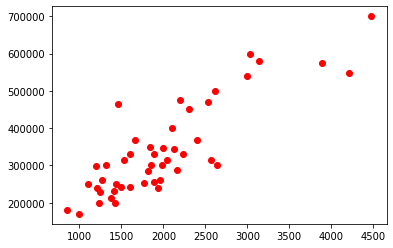

In [59]:
# Plot the data
plt.plot(x_sqft, y_value, "ro")
# Sample the range from minimum to maximum sqft to get 100 points
increment = (x_sqft.max() - x_sqft.min())/100
sampleData = np.empty
for i in range(1, 100):
  sampleData = np.append(sampleData, i * increment + x_sqft.min())
# Apply the best fit equation to each sample point and plot the result
sample_y = [5, 5] * 134.5
plt.plot(sampleData, sample_y)

1: Given these parameters, how much should a house with 1600 sqft cost?

(YOUR ANSWER HERE)

In [60]:
134.5 * 1600 + 71270.5

286470.5

2: From the dataset, how much did a house with 1600 sqft actually cost?

(YOUR ANSWER HERE)

In [61]:
y_value[1]

329900.0

3: Assuming the current 1600 sqft house would sell for as much as the historical one, how much money would we have lost? What percentage of the total price is this?

$43429.50, 
15.16% (of modelled sale price)

Now compare the values for 𝑚 and 𝑏 that sklearn generated in the tutorial notebook with the values that you found just now with your function. Hopefully they match.

In [ ]:
print("Sklearn:",134.52528772, 71270.492448729)
print("My function:",mm,bb)

Sklearn: 134.52528772 71270.492448729


---
Remember how despite adding an entire new variable, the $R^2$ value barely increased? Let's investigate this further by finding the correlation ($R^2$) value for a regression of square footage vs. number of bedrooms.

In [66]:
import sklearn.linear_model as lm

## YOUR CODE HERE
y_beds = data_array[:,1]
model = lm.LinearRegression()
x_sqft_shaped = x_sqft.reshape(-1,1)
housepredictor = model.fit(x_sqft_shaped,y_beds)
housepredictor.score(x_sqft_shaped,y_beds)

0.3135632699338187

Do 2 variables have to be very correlated to reduce their effectiveness together?

No?

## Logistic

We are going to predict wheter or not someone has breast cancer using Logistical Regression! We are going to use sklearn's breast cancer dataset! It is up to you to decide what features to get the best results!

In [97]:
from sklearn.datasets import load_breast_cancer #datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

X_cols = ['mean radius', 'mean texture']
Y_cols = ['target']

## YOUR CODE HERE
test_size = .9
X_train, X_val, y_train, y_val = train_test_split(df[X_cols], df[Y_cols], test_size=test_size, random_state=1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Test your logistical regression! You must get an accuracy of > 80%

In [98]:
from sklearn.metrics import accuracy_score

## YOUR CODE HERE
y_val_pred=logreg.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Validation Accuracy is  88.69395711500975
